---
# Get Data

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path = Path('/kaggle/input/house-prices-advanced-regression-techniques/')

sns.set()
plt.style.use('dark_background')

pd.set_option('display.max_rows', None, 'display.max_columns', None)

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
data_train = pd.read_csv(path/'train.csv')
data_test = pd.read_csv(path/'test.csv')
data_sample_submission = pd.read_csv(path/'sample_submission.csv')

with open(path/'data_description.txt', mode='r') as txt:
    data_description = txt.read()

In [3]:
print(f"Shape of data: {data_train.shape[0]} rows and {data_train.shape[1]} columns\n")
data_train.head(3)

Shape of data: 1460 rows and 81 columns



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


---
#  **EDA**

In [4]:
df_train = data_train.drop(columns=['Id'])
df_test = data_test.drop(columns=['Id'])

In [5]:
df_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 80 entries, MSSubClass to SalePrice
dtypes: float64(3), int64(34), object(43)
memory usage: 912.6+ KB


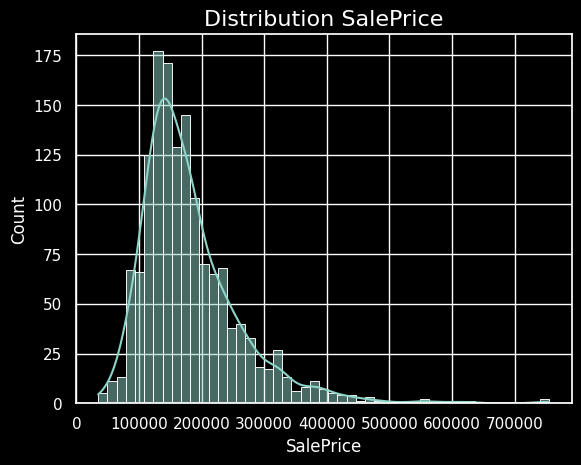

In [32]:
sns.histplot(df_train['SalePrice'], kde=True)
plt.title("Distribution SalePrice", size=16)
plt.show()

---
## ❌ Missing values

In [28]:
miss_val_train = df_train.isna().sum()[df_train.isna().sum() > 0].sort_values(ascending=False)
miss_val_test = df_test.isna().sum()[df_test.isna().sum() > 0].sort_values(ascending=False)

print(f"Columns with missing values in train data: {miss_val_train.shape[0]}\n\t\t\t       test  data: {miss_val_test.shape[0]}")

Columns with missing values in train data: 19
			       test  data: 33


In [8]:
miss_val = pd.DataFrame([miss_val_train, miss_val_test], index=["train", "test"])
print(f"Missing values in {miss_val.shape[1]} features between train and test sets\n")
miss_val

Missing values in 34 features between train and test sets



,PoolQC,MiscFeature,Alley,Fence,MasVnrType,FireplaceQu,LotFrontage,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,Electrical,MSZoning,BsmtFullBath,BsmtHalfBath,Functional,Utilities,GarageCars,GarageArea,TotalBsmtSF,KitchenQual,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1,Exterior2nd,Exterior1st,SaleType
train,1453.0,1406.0,1369.0,1179.0,872.0,690.0,259.0,81.0,81.0,81.0,81.0,81.0,38.0,38.0,37.0,37.0,37.0,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test,1456.0,1408.0,1352.0,1169.0,894.0,730.0,227.0,76.0,78.0,78.0,78.0,78.0,42.0,44.0,42.0,45.0,44.0,15.0,NaN,4.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
numr_feats = []
for feature in df_train.columns:
    if feature != 'SalePrice' and df_train[feature].dtype != 'object':
        numr_feats.append(feature)

catg_feats = []
for feature in df_train.columns:
    if feature != 'SalePrice' and df_train[feature].dtype == 'object':
        catg_feats.append(feature)

numr_feats_miss = []
for feature in numr_feats:
    if feature in miss_val.columns:
        numr_feats_miss.append(feature)
        
catg_feats_miss = []
for feature in catg_feats:
    if feature in miss_val.columns:
        catg_feats_miss.append(feature)

---
## Numerical Features vs Target Variable

In [10]:
# for feature in numr_feats:
#     sns.scatterplot(x=df_train[feature], y=df_train['SalePrice'], color="green")
#     sns.regplot(x=df_train[feature], y=df_train['SalePrice'], color="red", scatter=False, ci=None)
#     plt.title(f"{feature} vs target", size=20)
#     plt.show()

---
## Categorical Features

In [11]:
# for feature in catg_feats:
#     sns.countplot(x=df_train[feature], color="green")
#     plt.title(f"Count of {feature}", size=20)
#     plt.show()

---
## Distribution of Numerical Features

In [12]:
# for feature in numr_feats:
#     sns.histplot(df_train[feature], kde=True, color="green")
#     plt.title(f"Distribution of {feature}", size=20)
#     plt.show()

---
## Correlations

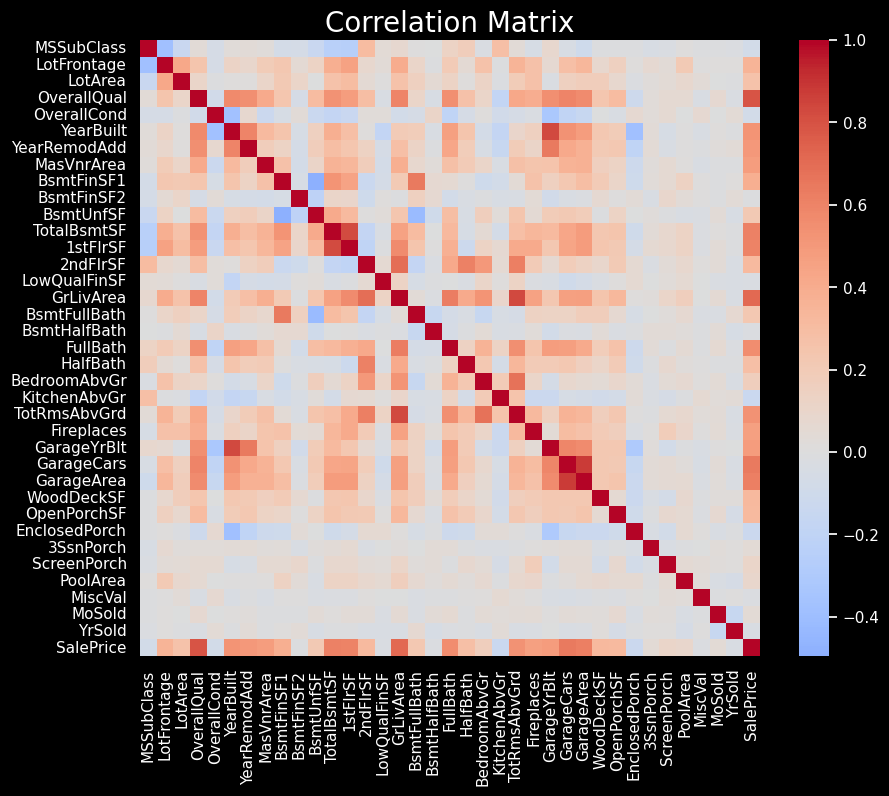

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train[numr_feats + ['SalePrice']].corr(), center=0, cmap='coolwarm')
plt.title("Correlation Matrix", size=20)
plt.show()

---
# **Preprocessing**

## Plan:
- Drop columns:
    - Id (not a feature, not usefull)
- Missing values:
    - Numerical: all with median
        - LotFrontage
        - MasVnrArea
        - BsmtFinSF1
        - BsmtFinSF2
        - BsmtUnfSF
        - TotalBsmtSF
        - BsmtFullBath
        - BsmtHalfBath
        - GarageYrBlt
        - GarageCars
        - GarageArea
    - Categorical: 8 with mode, 15 with 'none'
        - MSZoning : mode
        - Alley : 'none'
        - Utilities : mode
        - Exterior1st : mode
        - Exterior2nd : mode
        - MasVnrType : 'none'
        - BsmtQual : 'none'
        - BsmtCond : 'none'
        - BsmtExposure : 'none'
        - BsmtFinType1 : 'none'
        - BsmtFinType2 : 'none'
        - Electrical : mode
        - KitchenQual : mode
        - Functional : mode
        - FireplaceQu : 'none'
        - GarageType : 'none'
        - GarageFinish : 'none'
        - GarageQual : 'none'
        - GarageCond : 'none'
        - PoolQC : 'none'
        - Fence : 'none'
        - MiscFeature : 'none'
        - SaleType : mode
    - Get dummies with train and test together to be easier and match number of features

In [17]:
catg_feats_miss_mode = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical', 'KitchenQual', 'Functional', 'SaleType']

catg_feats_miss_none = catg_feats_miss.copy()
for feature in catg_feats_miss_mode:
    catg_feats_miss_none.remove(feature)

In [18]:
def preprocess(df):
#     drop columns
    df = df.drop(columns=['Id'])
    
#     fill missing values
    for feature in numr_feats_miss:
        df[feature] = df[feature].fillna(int(df[feature].median()))
    for feature in catg_feats_miss_mode:
        df[feature] = df[feature].fillna(df[feature].mode()[0])
    for feature in catg_feats_miss_none:
        df[feature] = df[feature].fillna('none')
    
    return df

In [19]:
df_train_prepro = preprocess(data_train)
df_test_prepro = preprocess(data_test)

# Combine train and test just to get dummies easier and match number of features
train_test_dummies = pd.concat([df_train_prepro, df_test_prepro])
train_test_dummies = pd.get_dummies(train_test_dummies, drop_first=True)
df_train_prepro = train_test_dummies.iloc[:data_train.shape[0]]
df_test_prepro = train_test_dummies.iloc[data_train.shape[0]:].drop(columns=(['SalePrice']))

print(f"Features on train data: {df_train_prepro.shape[1]}\n\t    test  data: {df_test_prepro.shape[1]}")

Features on train data: 260
	    test  data: 259


---
## Simplest model

In [20]:
X = df_train_prepro.drop(columns=['SalePrice'])
y = df_train_prepro['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

model = GradientBoostingRegressor(random_state=38)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmsle = mean_squared_log_error(y_test, y_pred, squared=False).round(5)
print(f"Root Mean Squared Error of logs: {rmsle}")

Root Mean Squared Error of logs: 0.14322


---
##  GridSearchCV

In [21]:
model = GradientBoostingRegressor(random_state=38)

parameters = {'n_estimators': [50, 100, 200, 300, 500],
              'criterion': ['friedman_mse', 'squared_error'],
              'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0, 0.001, 0.005, 0.01]}

gscv = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_root_mean_squared_error')
gscv.fit(X_train, y_train)

y_pred = gscv.predict(X_test)
rmsle = mean_squared_log_error(y_test, y_pred, squared=False).round(5)
print(f"Root Mean Squared Error of logs: {rmsle}\n")
gscv.best_estimator_

Root Mean Squared Error of logs: 0.1363



GradientBoostingRegressor(ccp_alpha=0, criterion='squared_error',
                          max_features='sqrt', n_estimators=300,
                          random_state=38)

### Recaps:
- With no preprocessing (just fillna and get_dummies) and most simple RandomForestRegressor model. RMSLE: 0.15632
- Filling missing values with sense and get dummies with train and test. RMSLE: 0.15515
- get_dummies with drop_first=true. RMSLE: 0.15513
- Using GradientBoostingRegressor instead. RMSLE: 0.14322
- Tuning with GridSearch: RMSLE: 0.1363

---
##  Final Model and Submission

In [22]:
model = GradientBoostingRegressor(ccp_alpha=0, criterion='squared_error', max_features='sqrt', n_estimators=300, random_state=38)
model.fit(X, y)

pred = model.predict(df_test_prepro)
pred = pd.DataFrame({"Id": data_test['Id'], "SalePrice": pred})
pred.to_csv("submission.csv", index=False)
pred.head(2)

,Id,SalePrice
0,1461,133283.490488
1,1462,159689.271580


---